<a href="https://colab.research.google.com/github/ylmgrbzz/Data-Visualization-Of-Coffee-and-Avocado-Prices-By-Year/blob/main/Estimating_the_Coffee_Price_Using_Fbprophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 64 kB 2.1 MB/s 
  ERROR: Failed building wheel for fbprophet
  Running setup.py clean for fbprophet
Failed to build fbprophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 1.0.7
    Uninstalling cmdstanpy-1.0.7:
      Successfully uninstalled cmdstanpy-1.0.7
    Running setup.py install for fbprophet ... error
ERROR: Command errored out with exit status 1: /usr/bin/python3 -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-rukgaf_e/fbprophet_bd53fd06df264649b0cf5616acbad303/setup.py'"'"'; __file__='"'"'/tmp/pip-install-rukgaf_e/fbprophet_bd53fd06df264649b0cf5616acbad303/setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.c

In [2]:
import pandas as pd
import seaborn as sns
from prophet import Prophet 

In [4]:
coffee=pd.read_csv("coffee.csv")

In [5]:
coffee.head(3)

,Date,Open,High,Low,Close,Volume,Currency
0,2000-01-03,122.25,124.0,116.10,116.50,6640,USD
1,2000-01-04,116.25,120.5,115.75,116.25,5492,USD
2,2000-01-05,115.00,121.0,115.00,118.60,6165,USD


In [6]:
coffee=coffee[["Date","Close"]]
coffee.head(3)

,Date,Close
0,2000-01-03,116.50
1,2000-01-04,116.25
2,2000-01-05,118.60


In [7]:
coffee.columns=["ds","y"]

In [8]:
coffee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5746 entries, 0 to 5745
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ds      5746 non-null   object 
 1   y       5746 non-null   float64
dtypes: float64(1), object(1)
memory usage: 89.9+ KB


In [10]:
coffee["ds"]=pd.to_datetime(coffee["ds"])
coffee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5746 entries, 0 to 5745
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      5746 non-null   datetime64[ns]
 1   y       5746 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 89.9 KB


In [11]:
model=Prophet()
model.fit(coffee)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [12]:
future=model.make_future_dataframe(periods=900)

In [13]:
future

,ds
0,2000-01-03
1,2000-01-04
2,2000-01-05
3,2000-01-06
4,2000-01-07
...,...
6641,2025-02-14
6642,2025-02-15
6643,2025-02-16
6644,2025-02-17


In [14]:
tahmin=model.predict(future)
tahmin

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2000-01-03,105.724075,83.784718,129.430838,105.724075,105.724075,2.106406,2.106406,2.106406,-1.520318,-1.520318,-1.520318,3.626725,3.626725,3.626725,0.0,0.0,0.0,107.830481
1,2000-01-04,105.631118,84.912069,131.021453,105.631118,105.631118,2.521147,2.521147,2.521147,-1.252974,-1.252974,-1.252974,3.774120,3.774120,3.774120,0.0,0.0,0.0,108.152265
2,2000-01-05,105.538161,85.241082,129.928448,105.538161,105.538161,2.796354,2.796354,2.796354,-1.104766,-1.104766,-1.104766,3.901121,3.901121,3.901121,0.0,0.0,0.0,108.334516
3,2000-01-06,105.445204,85.701774,132.264352,105.445204,105.445204,2.866446,2.866446,2.866446,-1.141152,-1.141152,-1.141152,4.007598,4.007598,4.007598,0.0,0.0,0.0,108.311650
4,2000-01-07,105.352247,84.717943,131.596126,105.352247,105.352247,2.845976,2.845976,2.845976,-1.247830,-1.247830,-1.247830,4.093806,4.093806,4.093806,0.0,0.0,0.0,108.198223
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6641,2025-02-14,263.128470,148.829435,400.547037,145.245472,400.871336,2.303916,2.303916,2.303916,-1.247830,-1.247830,-1.247830,3.551746,3.551746,3.551746,0.0,0.0,0.0,265.432386
6642,2025-02-15,263.197935,156.360094,410.040452,145.138437,401.212467,7.704139,7.704139,7.704139,4.136283,4.136283,4.136283,3.567855,3.567855,3.567855,0.0,0.0,0.0,270.902073
6643,2025-02-16,263.267399,144.479817,401.042227,145.031402,401.552083,5.716667,5.716667,5.716667,2.130758,2.130758,2.130758,3.585910,3.585910,3.585910,0.0,0.0,0.0,268.984066
6644,2025-02-17,263.336864,148.722908,396.463586,144.924367,401.871433,2.085410,2.085410,2.085410,-1.520318,-1.520318,-1.520318,3.605728,3.605728,3.605728,0.0,0.0,0.0,265.422274


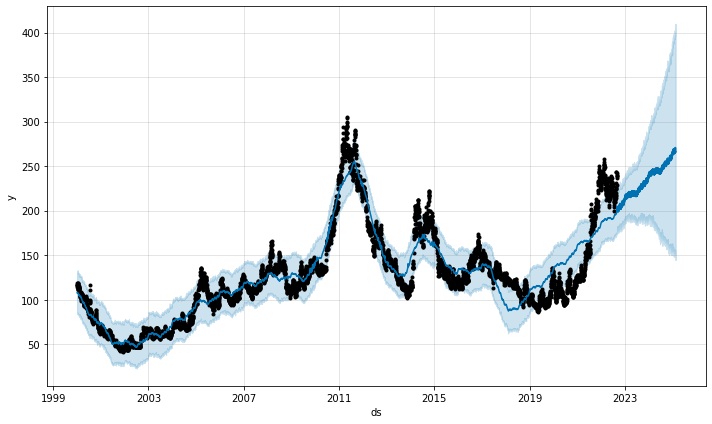

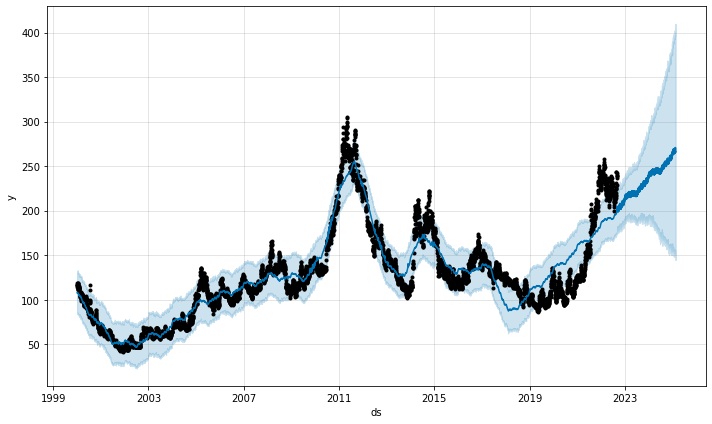

In [15]:
model.plot(tahmin)


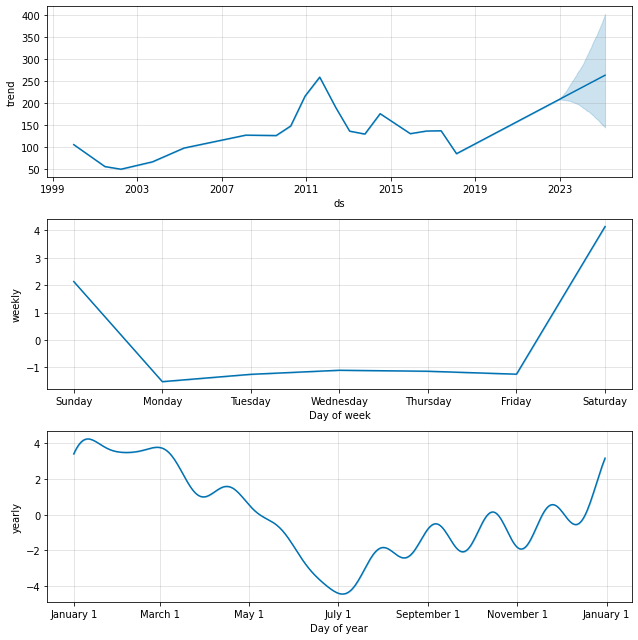

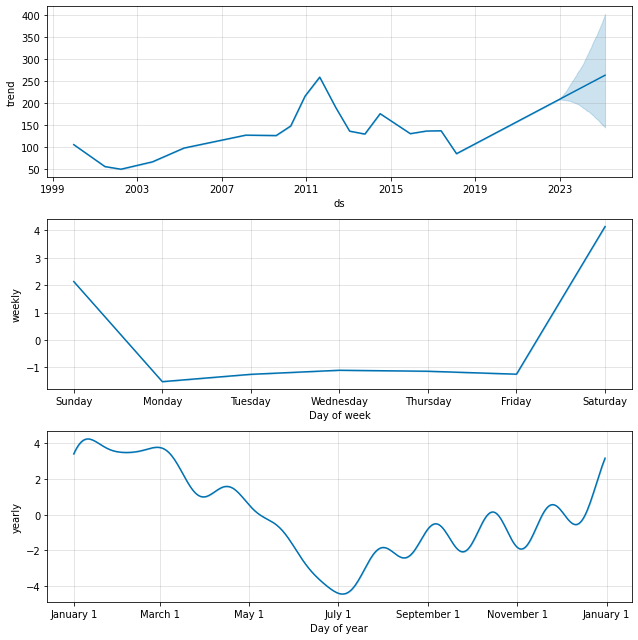

In [16]:
model.plot_components(tahmin)